In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [2]:
# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Classes
feature_names = iris.feature_names
target_names = iris.target_names


In [4]:
# Convert to a DataFrame for EDA
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y


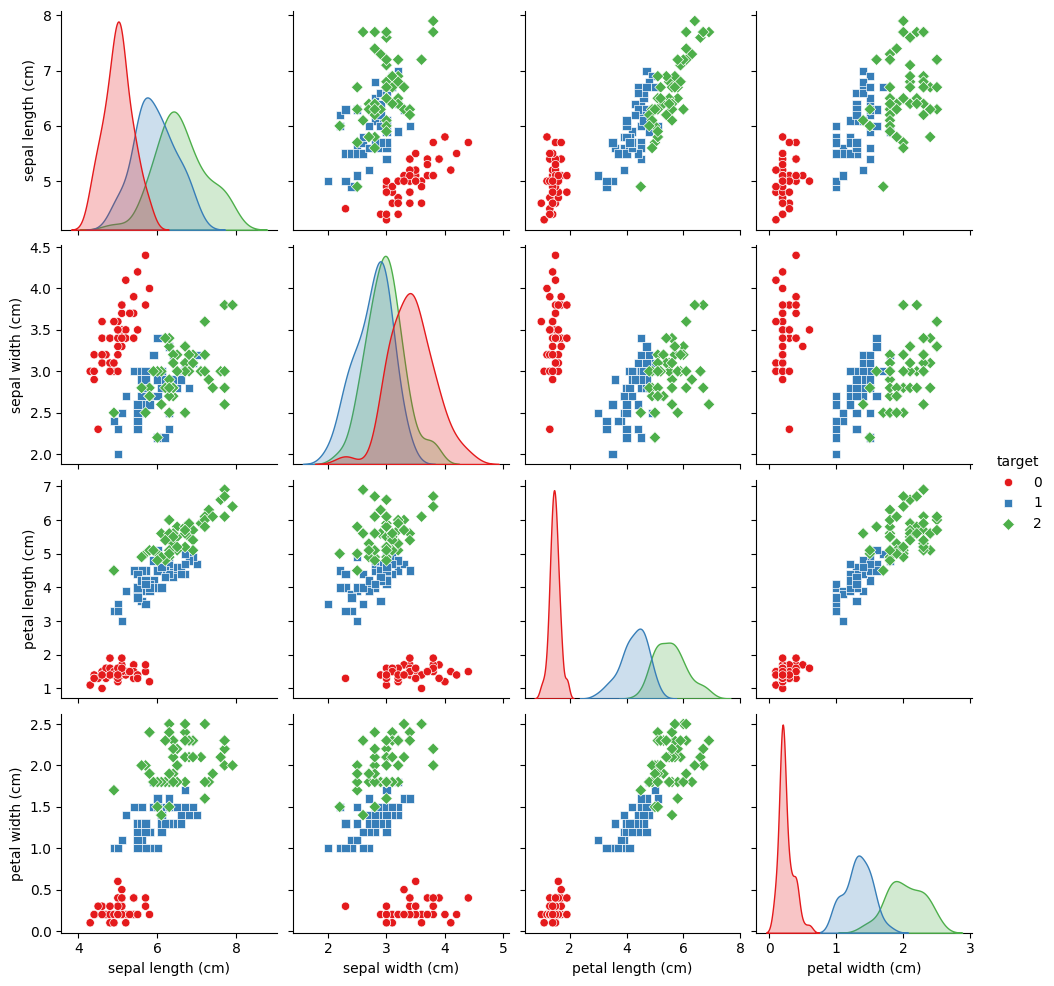

In [5]:
# Quick Exploratory Data Analysis (EDA)
sns.pairplot(df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.show()

In [6]:
# 2. Standardization: Mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [7]:
# 3. Compute the Covariance Matrix
cov_matrix = np.cov(X_standardized.T)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [8]:
# 4. Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)



Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [9]:
# 5. PCA Transformation
# Sort the eigenvectors by the magnitude of their eigenvalues (descending order)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_idx]
eigenvectors_sorted = eigenvectors[:, sorted_idx]

In [10]:
# Project the data onto the first two principal components
X_pca = X_standardized.dot(eigenvectors_sorted[:, :2])


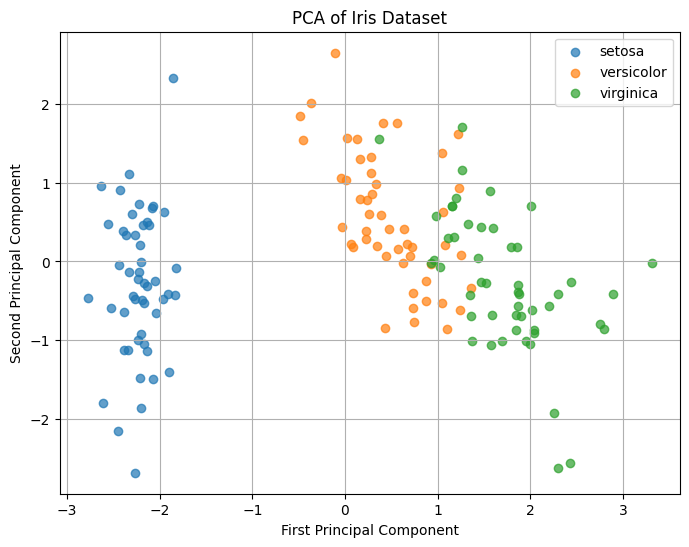

In [11]:
# 6. Visualization: Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7)

plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid()
plt.show()